# Opentrons Mass Balance Automation 

## Aniket Chitre, Daniil Bash - AMDM Group

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Set Serial Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Real-time Data

In [3]:
def get_mass(port):
    balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
    balance.write('S\r\n'.encode('utf-8'))
    time.sleep(1)
    result  = balance.read_until('\r\n'.encode('utf-8'))
    value = str(result[7:14].decode("utf-8"))
    if (value.strip() != '-------') and (value.strip() != ''):
        return (True,float(value))
    return (False,-1)

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.001
-0.001
-0.001
-0.001
-0.001
-0.001
-0.001
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.002
-0.002
-0.002
-0.002
-0.002
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.004
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.003
-0.004
-0.004
-0.004
-0.003
-0.001
-0.004
-0.004
-0.003
-0.004
-0.001
-0.007
-0.008
-0.006
-0.007
-0.006
-0.006
-0.007
1.0
1.0
0.999
0.998
2.001
2.001
2.001
2.001
3.007
3.007
3.008
3.008
4.011
4.014
4.014
4.015
5.019
5.019


58.048
58.047
58.047
58.047
58.489
58.522
58.522
58.521
58.52
58.52
58.844
58.85
58.86
58.86
58.859
58.859
58.859
58.859
59.403
59.403
59.406
59.405
59.404
59.404
59.404
59.404
59.924
59.924
59.924
59.923
59.924
60.531
60.537
60.537
60.536
60.535
60.535
60.534
60.534
60.534
60.535
60.534
60.536
60.536
60.536
60.536
60.535
60.535
60.535
60.535
60.535
60.535
60.535
60.535
60.535
60.535
60.535
60.535
60.534
60.534
60.534
60.534
60.533
60.533
60.532
60.532
60.532
60.531
60.531
60.531
60.531
60.532
60.531
60.531
60.531
60.531
60.531
60.53
60.53
60.53
60.53
60.53
60.53
60.53
60.53
60.528
60.528
60.528
60.528
60.528
60.528
60.528
60.528
60.528
60.527
60.527
60.527
60.527
60.527
60.526
60.526
60.525
60.525
60.525
60.525
60.525
60.525
60.525
60.524
60.524
60.524
60.524
60.524
60.524
60.524
60.523
60.523
60.523
60.522
60.522
60.522
60.522
60.522
60.522
60.522
60.521
60.521
60.521
60.521
60.521
60.521
60.52
60.519
60.519
60.519
60.519
60.519
60.519
60.519
60.519
60.519
60.518
60.517
60.517
60.517

SerialException: could not open port 'COM5': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [5]:
results = {'Time': x[:-1], 'Mass': mass}

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.001
1,2,-0.001
2,4,-0.001
3,6,-0.001
4,8,-0.001
...,...,...
1348,2696,60.514
1349,2698,60.514
1350,2700,60.514
1351,2702,60.514


<IPython.core.display.Javascript object>


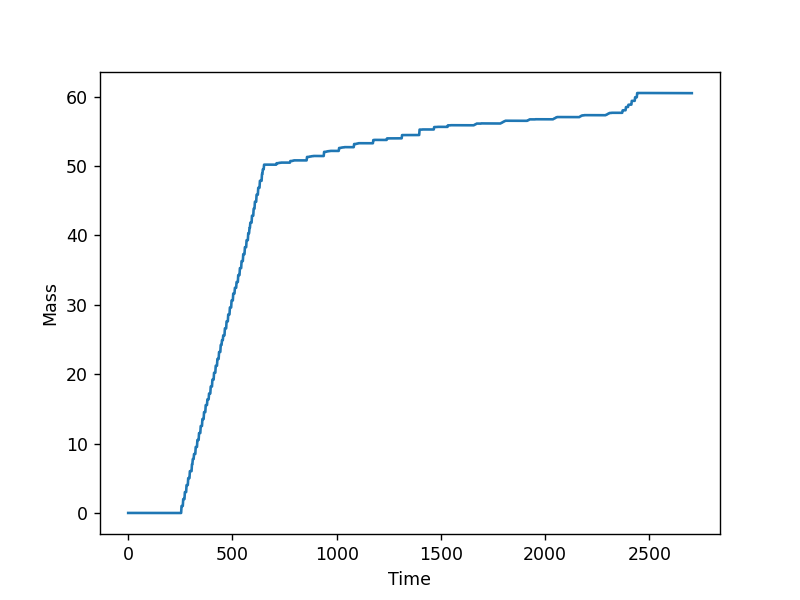

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [9]:
mass_df.to_csv('mass_data/MassProfile_091222_S1-6.csv')